In [1]:
import pandas as pd

trainDf = pd.read_csv("Train.csv")
trainDf

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [2]:
X = trainDf.iloc[:,0:5].copy()

In [3]:
X.columns = trainDf.columns.to_list()[0:5]

In [4]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077
...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149
1596,-0.076099,0.255257,0.290054,1.796036,0.340350
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334


In [5]:
Y = trainDf.iloc[:,5:].copy()
Y.columns = trainDf.columns.to_list()[5:]

In [6]:
Y

,target
0,-82.154667
1,-48.897960
2,77.270371
3,-2.988581
4,-37.596722
...,...
1595,-80.110012
1596,118.315601
1597,-107.510508
1598,-47.341558


In [7]:
X = X.values
Y = Y.values

In [8]:
X.shape

(1600, 5)

In [9]:
import numpy as np
x0feature = np.ones((X.shape[0],1))
x0feature.shape
X.shape
X = np.hstack((x0feature,X))
X

array([[ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602,
         0.52566183],
       [ 1.        , -0.83608408, -0.18922804, -0.77640262, -1.05383124,
         0.59799685],
       [ 1.        ,  0.23642511,  0.13283602, -0.14772298,  0.69985396,
        -0.18736416],
       ...,
       [ 1.        ,  1.04417694, -0.89920649,  1.73039905, -1.87105676,
         0.44251965],
       [ 1.        , -1.2691729 , -0.00505216,  1.85766873, -1.08036482,
         0.73633394],
       [ 1.        , -1.88400025, -0.84942743, -1.45227035,  0.48861308,
         1.4595758 ]])

In [10]:
X.shape

(1600, 6)

In [11]:
Y.shape

(1600, 1)

In [12]:
import numpy as np
def hypothesis(X, theta):
    return np.dot(X, theta)

In [13]:
def error(X, Y, theta):
    total_error = 0.0
    Yhat = hypothesis(X, theta)
    print(Yhat)
    total_error = np.sum((Y - Yhat)**2)
    print(total_error)
    m = X.shape[0]
    return total_error/m

In [14]:
def gradient(X, Y, theta):
    grad = np.dot(X.T, (hypothesis(X, theta) - Y))
    return grad/X.shape[0] # m examples

In [15]:
theta_temp = np.zeros((X.shape[1],1)) # n features
theta_temp.shape

(6, 1)

In [16]:

(Y - hypothesis(X, theta_temp))

array([[ -82.15466656],
       [ -48.89796018],
       [  77.2703707 ],
       ...,
       [-107.51050797],
       [ -47.34155781],
       [-115.93900296]])

In [17]:
X.shape

(1600, 6)

In [18]:
theta_temp.shape

(6, 1)

In [19]:
def GradientDescent(X, Y, learning_rate = 0.1, max_iters = 300):
    theta = np.zeros((X.shape[1], 1)) # n features
    error_list = []
    for i in range(max_iters):
        error_list.append(error(X, Y, theta))
        grad = gradient(X, Y, theta)
        # print(grad.shape)
        theta = theta - learning_rate * grad
        
    return theta, error_list

In [20]:
theta, error_list = GradientDescent(X, Y)
error_list

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
19609808.662452634
[[ -6.48814273]
 [ -9.02106246]
 [  5.0472132 ]
 ...
 [-13.46222148]
 [ -7.85055476]
 [-11.58473119]]
15913606.677003242
[[-12.25670047]
 [-17.13168914]
 [  9.62092423]
 ...
 [-25.38096029]
 [-14.77187706]
 [-22.01551955]]
12941777.118668512
[[-17.38480384]
 [-24.42381241]
 [ 13.76571317]
 ...
 [-35.93121283]
 [-20.87163392]
 [-31.40707826]]
10551762.283412632
[[-21.94294103]
 [-30.9800799 ]
 [ 17.52194435]
 ...
 [-45.26830239]
 [-26.2452049 ]
 [-39.8627448 ]]
8629170.026010932
[[-25.99389648]
 [-36.87479204]
 [ 20.92616714]
 ...
 [-53.53007638]
 [-30.97706897]
 [-47.47560571]]
7082188.786265238
[[-29.59358802]
 [-42.17474502]
 [ 24.01147841]
 ...
 [-60.83885935]
 [-35.14203607]
 [-54.32951049]]
5837113.777135378
[[-32.7918135 ]
 [-46.93998865]
 [ 26.80785038]
 ...
 [-67.30318905]
 [-38.80634082]
 [-60.49998562]]
4834762.581844682
[[-35.63291662]
 [-51.22450768]
 [ 29.34242706]
 ...
 [-73.01935918]
 [-42.02861347]
 [-66.05505

[12256.130414032896,
 9946.004173127027,
 8088.61069916782,
 6594.851427132895,
 5393.231266256833,
 4426.367991415774,
 3648.1961107096113,
 3021.726613652926,
 2517.2517417468493,
 2110.9060951328556,
 1783.5131148407538,
 1519.6601535538803,
 1306.9566825025533,
 1135.4392480411577,
 997.0940439380564,
 885.4737681101426,
 795.3900760490444,
 722.6666597127008,
 663.940955765063,
 616.5048690656037,
 578.1768048152013,
 547.198830562152,
 522.154013174583,
 501.8999565275402,
 485.5153515365618,
 472.25698009831086,
 461.5251195224689,
 452.8356990069189,
 445.7978845107532,
 440.096028940869,
 435.4751336386595,
 431.72913494533566,
 428.69146431754035,
 426.22743861257027,
 424.22812401613584,
 422.60538685403213,
 421.2879005864372,
 420.2179233350216,
 419.34869650824726,
 418.64234420936975,
 418.0681765309777,
 417.6013186798113,
 417.2216030354214,
 416.91267344794505,
 416.66126090364867,
 416.4565975975921,
 416.2899428248994,
 416.1541992363065,
 416.04360214151444,
 415.9

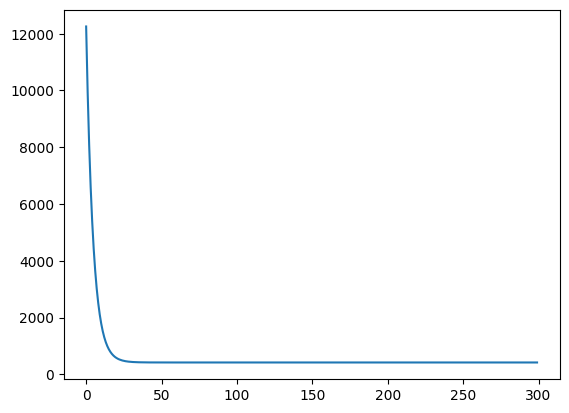

In [21]:
import matplotlib.pyplot as plt
plt.plot(error_list)

In [22]:
theta

array([[ 4.99096674],
       [29.68187118],
       [92.66247759],
       [ 8.28062089],
       [44.76773522],
       [ 2.51916121]])

In [23]:
Yhat = hypothesis(X, theta)
def r2_score(Y, Yhat):
    num = np.sum((Y - Yhat)**2)
    denom = np.sum((Y - Y.mean())**2)
    return 1 - (num/denom)

r2_score(Y, Yhat)

0.9660939669975617

In [24]:
X_test = pd.read_csv("Test/Test.csv")
X_test

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [25]:
X_test = X_test.values
X_test

array([[ 1.01525387e+00,  2.07620944e+00, -2.66434820e-01,
        -2.41808820e+00, -9.80502790e-01],
       [-3.75021204e-01,  9.53184528e-01,  6.26719138e-01,
         7.04405750e-01, -3.55489211e-01],
       [-1.02445225e+00,  9.62991107e-01, -4.07942004e-01,
        -1.86127383e+00,  4.55201351e-01],
       ...,
       [ 5.54727647e-01,  1.76824345e+00, -8.97787210e-01,
        -1.19366107e+00,  3.40563374e-01],
       [-1.62717246e+00,  8.56470994e-01, -5.65729519e-04,
         6.29386649e-01,  4.53382144e-01],
       [ 1.39310499e-01,  5.31597186e-01, -8.53107053e-01,
         3.16920076e-02,  1.71489304e+00]])

In [26]:
X_test.shape

(400, 5)

In [27]:
x0feature_test = np.ones((X_test.shape[0],1))
x0feature_test.shape

(400, 1)

In [28]:

X_test = np.hstack((x0feature_test,X_test))
X

array([[ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602,
         0.52566183],
       [ 1.        , -0.83608408, -0.18922804, -0.77640262, -1.05383124,
         0.59799685],
       [ 1.        ,  0.23642511,  0.13283602, -0.14772298,  0.69985396,
        -0.18736416],
       ...,
       [ 1.        ,  1.04417694, -0.89920649,  1.73039905, -1.87105676,
         0.44251965],
       [ 1.        , -1.2691729 , -0.00505216,  1.85766873, -1.08036482,
         0.73633394],
       [ 1.        , -1.88400025, -0.84942743, -1.45227035,  0.48861308,
         1.4595758 ]])

In [29]:
Yhat_test = hypothesis(X_test, theta)

In [30]:
Yhat_test_df = pd.DataFrame(Yhat_test,  columns=['target'])
Yhat_test_df

,target
0,114.583689
1,118.012815
2,-21.739852
3,-43.936899
4,-95.914898
...,...
395,-81.989000
396,-186.032535
397,125.292336
398,65.369841


In [31]:
Yhat_test_df.to_csv('Test/Yhat_test.csv', index=True, index_label=['id'])